## Decision Tree Basic code implementation

In [46]:
from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DT

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# loading the dataset
df = pd.read_csv(DT)

print(f'Shape of the Dataset: {df.shape}\n')
print(f'Missing values:\n {df.isnull().sum()}\n')
print(f'Dataset:\n {df.head()}')

Shape of the Dataset: (14, 2)

Missing values:
 Age      0
Price    0
dtype: int64

Dataset:
    Age  Price
0  1.0   18.0
1  2.0   16.0
2  3.0   14.0
3  5.0   10.0
4  7.0    7.0


In [49]:
#Preparing the data
X = df['Age'].values
y = df['Price'].values



In [50]:
# Training the model
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(
    max_depth = 3,
    min_samples_split = 2,
    min_samples_leaf = 1,
    random_state = 42
)

dt_regressor.fit(X.reshape(-1,1),y.reshape(-1,1))


y_pred = dt_regressor.predict(X.reshape(-1,1))

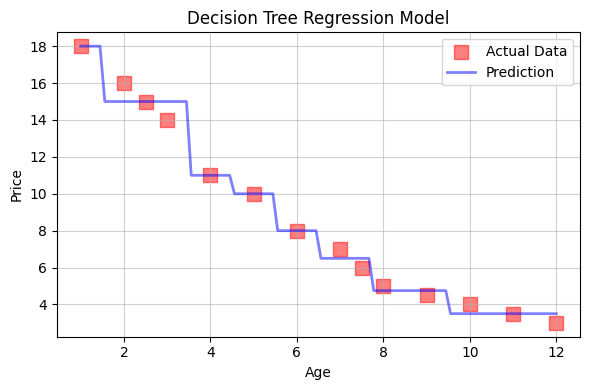

In [51]:
#visualization 

X_range = np.linspace(X.min(),X.max(),100).reshape(-1,1)

y_range_pred = dt_regressor.predict(X_range)


plt.figure(figsize=(6,4),)
plt.scatter(X,y,label='Actual Data',marker=',',s=100,color='r',alpha=0.5)
plt.plot(X_range,y_range_pred,label='Prediction',color='blue',alpha=0.5,linewidth=2)
plt.ylabel('Price')
plt.xlabel('Age')
plt.title('Decision Tree Regression Model')
plt.legend()
plt.grid(True,alpha=0.6)
plt.tight_layout()
plt.show()

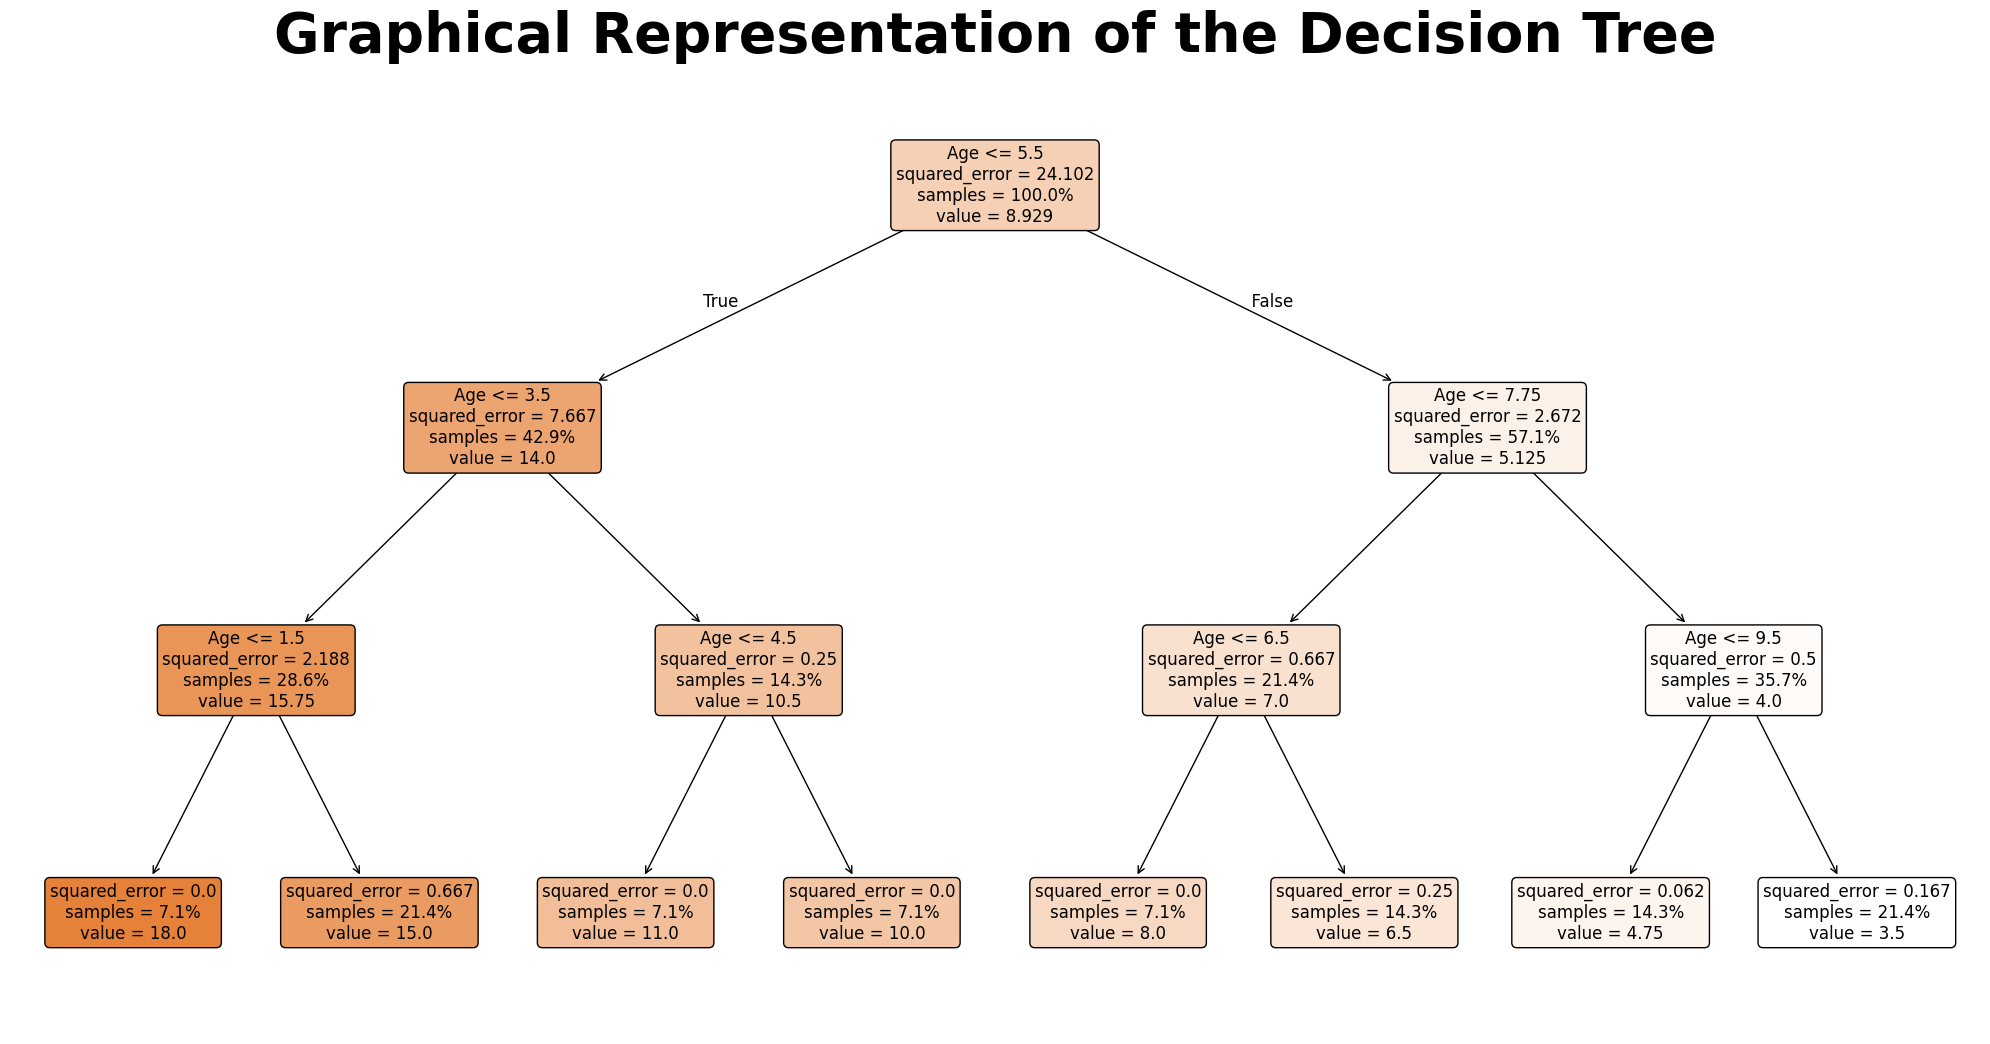

In [52]:
# Visualization tree
from sklearn.tree import plot_tree, export_text

tree_rules = export_text(dt_regressor,feature_names=['Age'])
# print(tree_rules)

# Graphical representation 
plt.figure(figsize=(20,10))
plot_tree(
    dt_regressor,
    feature_names=['Age'],
    filled = True,
    rounded = True,
    fontsize = 12,
    proportion = True
)
plt.tight_layout()
plt.title('Graphical Representation of the Decision Tree',fontsize=40,fontweight='bold')
plt.show()

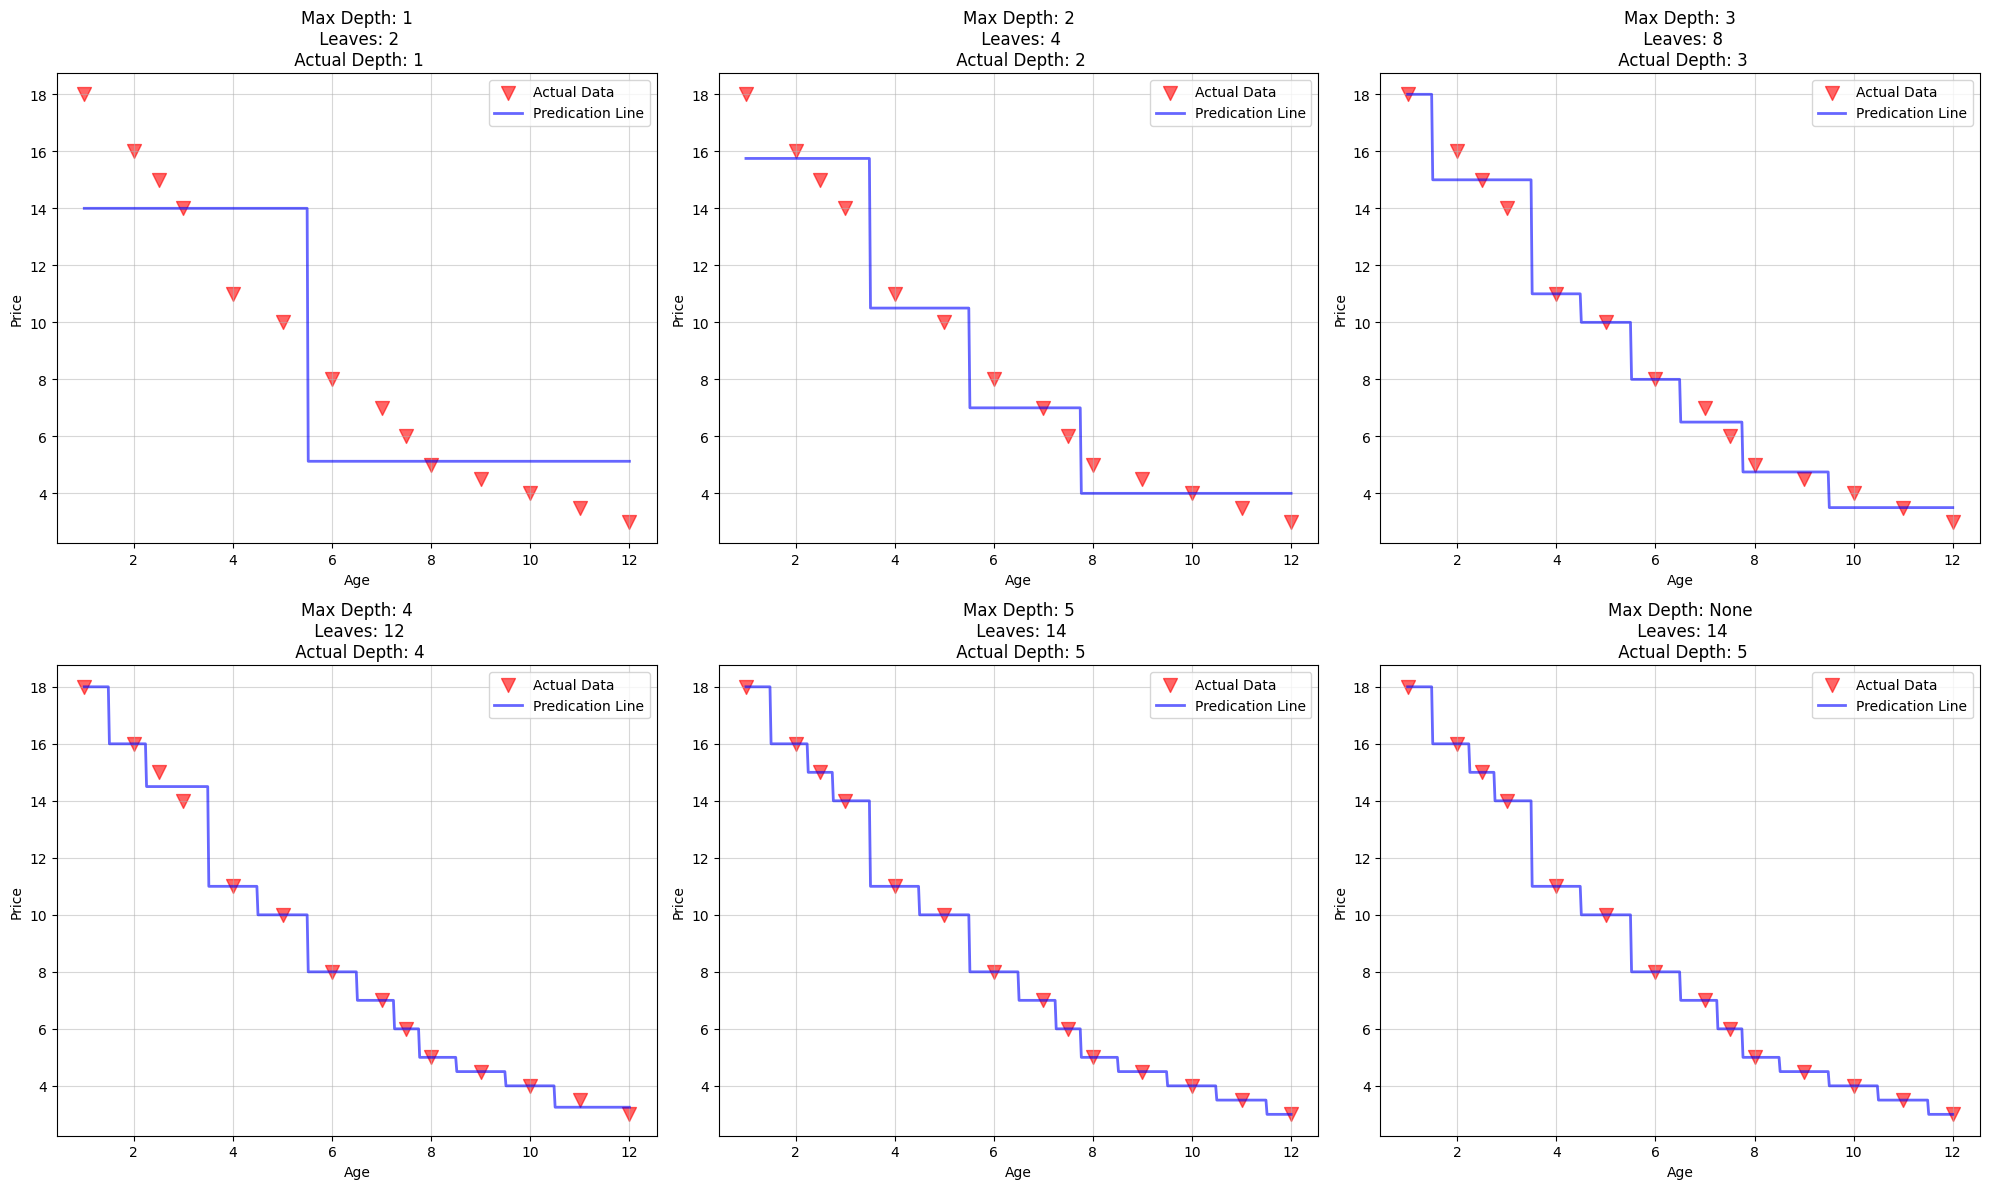

In [61]:
# Trying different depths 
depths = [1,2,3,4,5,None]

fig, axes = plt.subplots(2,3,figsize=(20,12))
axes = axes.ravel()

for idx, depth in enumerate(depths):
    dt = DecisionTreeRegressor(
        max_depth=depth,
        min_samples_leaf = 1,
        min_samples_split = 2,
        random_state = 42
    )

    X_range_1 = np.linspace(X.min(),X.max(),500).reshape(-1,1)

    dt.fit(X.reshape(-1,1),y.reshape(-1,1))

    y_pred_range = dt.predict(X_range_1)

    axes[idx].scatter(X,y,label='Actual Data',color='r',marker='v',s=100,alpha=0.6)
    axes[idx].plot(X_range_1,y_pred_range,label='Predication Line',color='blue',alpha=0.6,linewidth=2)
    axes[idx].set_title(f'Max Depth: {depth}\n Leaves: {dt.get_n_leaves()}\n Actual Depth: {dt.get_depth()}')
    axes[idx].set_ylabel('Price')
    axes[idx].set_xlabel('Age')

    axes[idx].grid(True,alpha=0.5)
    axes[idx].legend()

plt.tight_layout()
plt.show()